In [3]:
import glob 
import pandas as pd
import os
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup as BS 
from tqdm import tqdm
import folium
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm
import seaborn as sns
import pymysql
import warnings
warnings.filterwarnings('ignore')
con =pymysql.connect(host='ip', user='id', password='pw', db='db', charset='utf8')
cur = con.cursor()
# div로 가봐야겠다

In [5]:
# 자전거 월별 추세랑 자전고교통사거 합해서 
cycleRentUse = pd.read_sql_query("select * from CycleRentUse ", con=con)
age_accident_cycle_month = pd.read_sql_query("select * from age_accident_cycle_month", con=con)

In [13]:
cycleRentUse_group = cycleRentUse.groupby(["Rent_Date"],as_index=False)[["Rent_Count"]].sum()

In [14]:
cycleRentUse_group.shape

(60, 2)

In [18]:
cycleRentUse_group.head(1)

,Rent_Date,Rent_Count
0,2018-01,164320


In [74]:
age_accident_cycle_month_group = age_accident_cycle_month.groupby(["YEAR","MONTH"],as_index=False)[["ACC_CNT"]].sum()

In [75]:
age_accident_cycle_month_group.shape

(60, 3)

In [76]:
age_accident_cycle_month_group.head(1)
# age_accident_cycle_month_group["test"]=str(age_accident_cycle_month_group["YEAR"][0])

,YEAR,MONTH,ACC_CNT
0,2018,01,62


In [77]:
for i in range(len(age_accident_cycle_month_group)):
    age_accident_cycle_month_group.loc[i,"YEAR_MONTH"] = str(age_accident_cycle_month_group.loc[i,"YEAR"])+"-"+str(age_accident_cycle_month_group.loc[i,"MONTH"])

In [61]:
# str(age_accident_cycle_month_group["YEAR"])

'0     2018\n1     2018\n2     2018\n3     2018\n4     2018\n5     2018\n6     2018\n7     2018\n8     2018\n9     2018\n10    2018\n11    2018\n12    2019\n13    2019\n14    2019\n15    2019\n16    2019\n17    2019\n18    2019\n19    2019\n20    2019\n21    2019\n22    2019\n23    2019\n24    2020\n25    2020\n26    2020\n27    2020\n28    2020\n29    2020\n30    2020\n31    2020\n32    2020\n33    2020\n34    2020\n35    2020\n36    2021\n37    2021\n38    2021\n39    2021\n40    2021\n41    2021\n42    2021\n43    2021\n44    2021\n45    2021\n46    2021\n47    2021\n48    2022\n49    2022\n50    2022\n51    2022\n52    2022\n53    2022\n54    2022\n55    2022\n56    2022\n57    2022\n58    2022\n59    2022\nName: YEAR, dtype: int64'

In [78]:
age_accident_cycle_month_group

,YEAR,MONTH,ACC_CNT,YEAR_MONTH
0,2018,01,62,2018-01
1,2018,02,68,2018-02
2,2018,03,94,2018-03
3,2018,04,129,2018-04
4,2018,05,146,2018-05
5,2018,06,206,2018-06
6,2018,07,141,2018-07
7,2018,08,125,2018-08
8,2018,09,171,2018-09
9,2018,10,154,2018-10


In [79]:
# str(age_accident_cycle_month_group["YEAR"])

In [80]:
age_accident_cycle_month_group.head(1)

,YEAR,MONTH,ACC_CNT,YEAR_MONTH
0,2018,01,62,2018-01


In [92]:
cycleRentUse_group.head(1)

,Rent_Date,Rent_Count,rate
0,2018-01,164320,1.0


In [104]:
for i in range(len(cycleRentUse_group)):
    if i==0:
        cycleRentUse_group.loc[i,"rate"] = 1
    else:
        cycleRentUse_group.loc[i,"rate"] = int(cycleRentUse_group.loc[i,"Rent_Count"])/int(cycleRentUse_group.loc[i-1,"Rent_Count"])
    

In [105]:
for i in range(len(age_accident_cycle_month_group)):
    if i==0:
        age_accident_cycle_month_group.loc[i,"rate"] = 1
    else:
        age_accident_cycle_month_group.loc[i,"rate"] = int(age_accident_cycle_month_group.loc[i,"ACC_CNT"])/int(age_accident_cycle_month_group.loc[i-1,"ACC_CNT"])
    

In [106]:
age_accident_cycle_month_group.head(5)

,YEAR,MONTH,ACC_CNT,YEAR_MONTH,rate
0,2018,01,62,2018-01,1.000000
1,2018,02,68,2018-02,1.096774
2,2018,03,94,2018-03,1.382353
3,2018,04,129,2018-04,1.372340
4,2018,05,146,2018-05,1.131783


In [107]:
cycleRentUse_group.head(5)

,Rent_Date,Rent_Count,rate
0,2018-01,164320,1.000000
1,2018-02,168687,1.026576
2,2018-03,462584,2.742262
3,2018-04,668474,1.445087
4,2018-05,929061,1.389824


<Axes: xlabel='Rent_Date', ylabel='rate'>

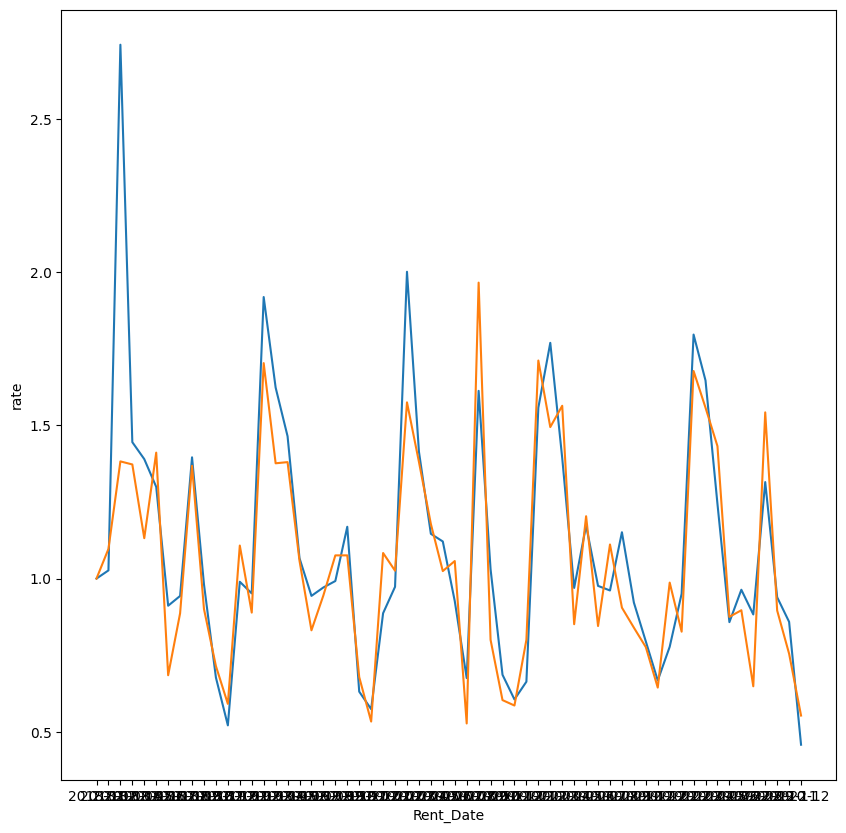

In [110]:
plt.figure(figsize=(10, 10))
sns.lineplot(x="Rent_Date", y="rate",data=cycleRentUse_group)
sns.lineplot(x="YEAR_MONTH", y="rate", data=age_accident_cycle_month_group)